### 数据预处理

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [165]:
load = pd.read_csv('data/load_del.csv')
weather = pd.read_csv('data/weather_del.csv')
# 数据解析
# 时间数据
month = load['Month'].to_numpy()  # 第几个月 1-12
day = load['Day'].to_numpy()  # 某月第几天 1-31
week = load['DOW/星期'].to_numpy()  # 某月第几天 1-7
hour = load['Hour'].to_numpy()  # 0-23
elc = load['KW/电负荷'].to_numpy()  # 电负荷
hot = load['HTmmBTU/热负荷'].to_numpy()  # 负荷
cold = load['CHWTON/冷负荷'].to_numpy()  
# 天气数据
env = weather.iloc[:,4:].to_numpy()
print(env.shape)
print(len(elc))
#电负荷异常处理
# 删除11月4-8号缺失值较多的数据段
# 值在异常范围外的，前后均值插值
err = (elc > 45000) | (elc < 5000)
for i,e in enumerate(err):
    if e:
        elc[i] = (elc[i-1]+elc[i+1])/2
        
# 计算前后差值, 直接保持前一个值
one_sub = elc[1:] - elc[:-1]        
err = (one_sub > 10000) | (one_sub < -10000)
for i,e in enumerate(err):
    if e:
        elc[i+1] = elc[i]

(8662, 11)
8662


In [ ]:
load
load.to_excel(r"load_sel.xlsx", index=False)

In [174]:
load = pd.read_csv('data/load.csv')
load['time_index'] = np.zeros(len(load))
count = 0
for i in range(len(load)):
    load['time_index'][i] = count
    count += 1
    try:
        if load['Month'][i+1] != load['Month'][i]:
            count = 0

SyntaxError: unexpected EOF while parsing (360853406.py, line 9)

In [177]:
load.to_csv(r"data/load.csv", index=False)

### 数据总结
month day week hour 为离散数值   其余都为连续数值 \
day数据用于划分train\val\test  \
month week hour 放入input
elc 和 env 放入input

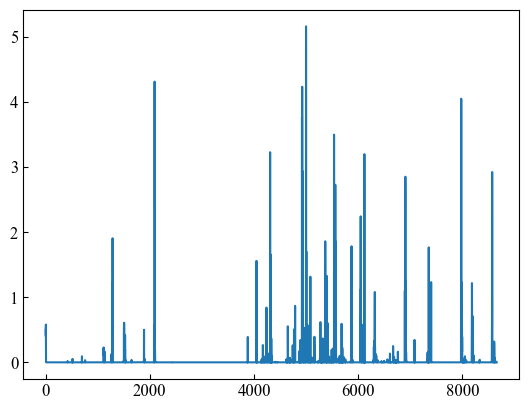

In [151]:
### embedding方法
# number_of_categories**0.25
plt.plot(env[:,3])